In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from forward_test import ForwardTest

In [2]:
# Parameters
ticker = 'SPY'
history_end_date = '2024-04-19'
target_end_date = '2025-06-30'
simu_start_date = '2024-01-01'
atr_window = 10
window_multiplier = 4.5
a = 0.999

ir_filename = 'daily-treasury-rates.csv'
mkt_filename = "spy_options_data_2021_2024.csv"

test = ForwardTest(
    ticker, 
    history_end_date, 
    target_end_date, 
    simu_start_date, 
    atr_window, 
    window_multiplier, 
    a,
    ir_filename, 
    mkt_filename
)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = test.simulation()
data.tail()

,Date,Close,Lower_Bound,IR,Strike_Price,Put_Price,Next_Week_Close,Use_Threshold
72,2025-05-23,520.896220,513.026023,0.053985,513,1.962717,515.394420,True
73,2025-05-30,515.394420,506.695531,0.054000,507,1.815785,520.620689,True
74,2025-06-06,520.620689,511.633946,0.053965,512,1.803656,521.065874,True
75,2025-06-13,521.065874,512.812233,0.053983,513,1.927116,518.710084,True
76,2025-06-20,518.710084,511.948179,0.053966,512,2.204650,514.274215,True


In [4]:
results_df, output_df = test.forward_test(data)
results_df

,date,strike_price,put_price,contracts,premium_received,profit_loss,account_balance,use_threshold,weekly_returns,total_gain
0,2024-01-05,452,0.130000,22,286.000000,0,1.000286e+06,True,NaN,286.000000
1,2024-01-12,457,0.110000,21,231.000000,0,1.000517e+06,True,0.000231,231.000000
2,2024-01-19,461,0.080000,21,168.000000,0,1.000685e+06,True,0.000168,168.000000
3,2024-01-26,471,0.190000,21,399.000000,0,1.001084e+06,True,0.000399,399.000000
4,2024-02-02,476,0.160000,21,336.000000,0,1.001420e+06,True,0.000336,336.000000
...,...,...,...,...,...,...,...,...,...,...
72,2025-05-23,513,1.962717,24,4710.519810,0,1.253647e+06,True,0.003772,4710.519810
73,2025-05-30,507,1.815785,24,4357.884892,0,1.258005e+06,True,0.003476,4357.884892
74,2025-06-06,512,1.803656,24,4328.775534,0,1.262333e+06,True,0.003441,4328.775534
75,2025-06-13,513,1.927116,24,4625.077470,0,1.266959e+06,True,0.003664,4625.077470


In [5]:
output_df

,Final Account Balance,Total Gain,Return on Investment (ROI),Annual Return,Sharpe Ratio,Win Rate,Threshold used
0,1.272250e+06,272249.675216,0.27225,0.274506,15.437366,1.0,1.0


In [8]:
N = 1000
returns = test.simulate_returns(N)

In [24]:
returns_dict = returns.mean().to_dict()
print("Final Account Balance:", returns_dict["Final Account Balance"])
print("Total Gain:", returns_dict['Total Gain'])
print("Return on Investment (ROI):", returns_dict['Return on Investment (ROI)'] * 100, "%")
print("Annual Return:", returns_dict['Annual Return'] * 100, "%")
print("Sharpe Ratio:", returns_dict['Sharpe Ratio'])
print("Win Rate:", returns_dict['Win Rate'] * 100, "%")
print("Threshold used:", returns_dict['Threshold used'])

Final Account Balance: 1279523.6864912435
Total Gain: 279523.6864912437
Return on Investment (ROI): 27.952368649124367 %
Annual Return: 28.18401811306738 %
Sharpe Ratio: 15.317525811587245
Win Rate: 99.96493506493506 %
Threshold used: 1.0


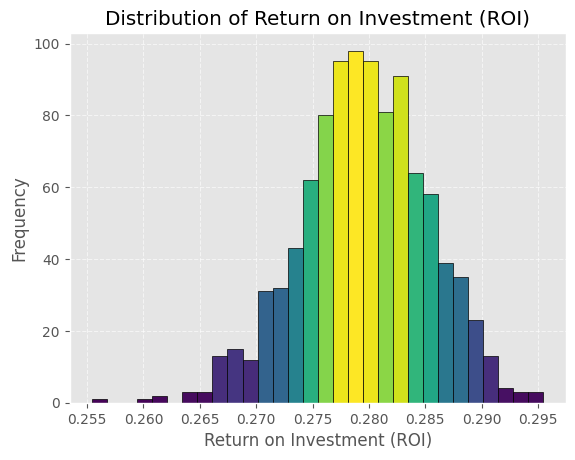

In [21]:
plt.style.use('ggplot')
n, bins, patches = plt.hist(returns['Return on Investment (ROI)'], bins=30, color='steelblue', edgecolor='black')
n = n / n.sum()
fracs = n / n.max()
norm = plt.Normalize(fracs.min(), fracs.max())

for this_frac, this_patch in zip(fracs, patches):
    color = plt.cm.viridis(norm(this_frac))
    this_patch.set_facecolor(color)

plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Frequency')
plt.title('Distribution of Return on Investment (ROI)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [26]:
N = 1000
for a1 in [0.95, 1.0, 1.05, 1.1]:
    print(f"a = {a1}")
    test = ForwardTest(
        ticker, 
        history_end_date, 
        target_end_date, 
        simu_start_date, 
        atr_window, 
        window_multiplier, 
        a1,
        ir_filename, 
        mkt_filename
    )
    returns = test.simulate_returns(N)
    returns_dict = returns.mean().to_dict()
    print("Final Account Balance:", returns_dict["Final Account Balance"])
    print("Total Gain:", returns_dict['Total Gain'])
    print("Return on Investment (ROI):", returns_dict['Return on Investment (ROI)'] * 100, "%")
    print("Annual Return:", returns_dict['Annual Return'] * 100, "%")
    print("Sharpe Ratio:", returns_dict['Sharpe Ratio'])
    print("Win Rate:", returns_dict['Win Rate'] * 100, "%")
    print("Threshold used:", returns_dict['Threshold used'])

a = 0.95
[*********************100%%**********************]  1 of 1 completed
Final Account Balance: 1022163.370344007
Total Gain: 22163.370344006908
Return on Investment (ROI): 2.216337034400694 %
Annual Return: 2.23470446838744 %
Sharpe Ratio: 34.68196977507812
Win Rate: 100.0 %
Threshold used: 0.025974025974025976
a = 1.0
[*********************100%%**********************]  1 of 1 completed
Final Account Balance: 1279519.2349839553
Total Gain: 279519.2349839554
Return on Investment (ROI): 27.951923498395537 %
Annual Return: 28.183569273244117 %
Sharpe Ratio: 15.309889258414058
Win Rate: 99.94935064935065 %
Threshold used: 1.0
a = 1.05
[*********************100%%**********************]  1 of 1 completed
Final Account Balance: 1279633.3252420258
Total Gain: 279633.32524202584
Return on Investment (ROI): 27.963332524202578 %
Annual Return: 28.19507284898879 %
Sharpe Ratio: 15.311382989903315
Win Rate: 99.95844155844156 %
Threshold used: 1.0
a = 1.1
[*********************100%%***********

In [27]:
N = 1000
for a1 in [0.96, 0.97, 0.98, 0.99]:
    print(f"a = {a1}")
    test = ForwardTest(
        ticker, 
        history_end_date, 
        target_end_date, 
        simu_start_date, 
        atr_window, 
        window_multiplier, 
        a1,
        ir_filename, 
        mkt_filename
    )
    returns = test.simulate_returns(N)
    returns_dict = returns.mean().to_dict()
    print("Final Account Balance:", returns_dict["Final Account Balance"])
    print("Total Gain:", returns_dict['Total Gain'])
    print("Return on Investment (ROI):", returns_dict['Return on Investment (ROI)'] * 100, "%")
    print("Annual Return:", returns_dict['Annual Return'] * 100, "%")
    print("Sharpe Ratio:", returns_dict['Sharpe Ratio'])
    print("Win Rate:", returns_dict['Win Rate'] * 100, "%")
    print("Threshold used:", returns_dict['Threshold used'])

a = 0.96
[*********************100%%**********************]  1 of 1 completed
Final Account Balance: 1035935.4981620368
Total Gain: 35935.49816203692
Return on Investment (ROI): 3.5935498162036845 %
Annual Return: 3.6233306157854828 %
Sharpe Ratio: 31.912680905412266
Win Rate: 100.0 %
Threshold used: 0.07792207792207793
a = 0.97
[*********************100%%**********************]  1 of 1 completed
Final Account Balance: 1068746.457002464
Total Gain: 68746.45700246406
Return on Investment (ROI): 6.874645700246401 %
Annual Return: 6.931617902182145 %
Sharpe Ratio: 23.241255507901123
Win Rate: 100.0 %
Threshold used: 0.22077922077922085
a = 0.98
[*********************100%%**********************]  1 of 1 completed
Final Account Balance: 1184047.3619724666
Total Gain: 184047.36197246658
Return on Investment (ROI): 18.404736197246656 %
Annual Return: 18.557261635345384 %
Sharpe Ratio: 16.65019074809573
Win Rate: 100.0 %
Threshold used: 0.22103896103896115
a = 0.99
[*********************100%%*

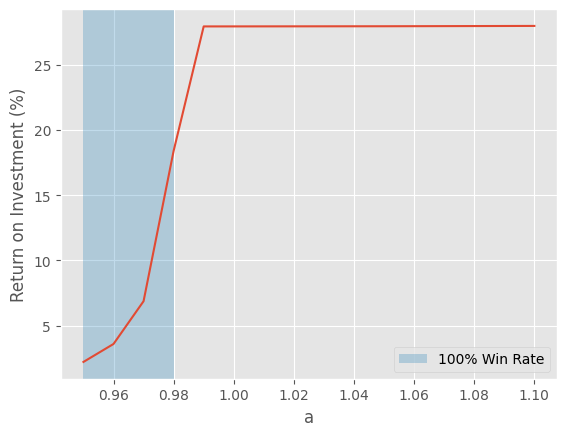

In [32]:
a = [0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.05, 1.1]
ROI = [
    2.216337034400694, 
    3.5935498162036845, 
    6.874645700246401, 
    18.404736197246656, 
    27.9504077181442, 
    27.951923498395537, 
    27.963332524202578,
    27.988455585270422
    ]

plt.plot(a, ROI)
plt.axvspan(0.95, 0.98, label='100% Win Rate', alpha=0.3)
plt.ylabel('Return on Investment (%)')
plt.xlabel('a')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


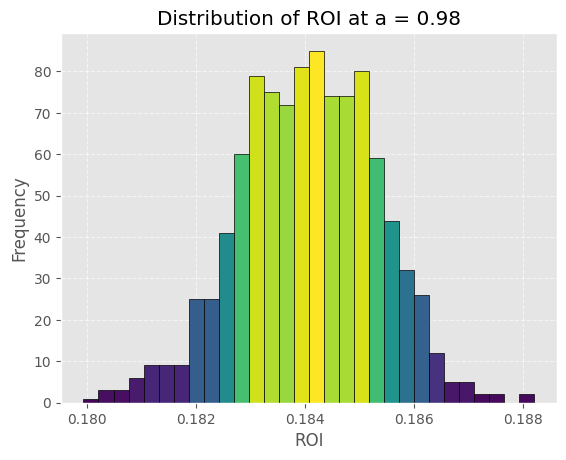

In [33]:
test = ForwardTest(
    ticker, 
    history_end_date, 
    target_end_date, 
    simu_start_date, 
    atr_window, 
    window_multiplier, 
    0.98,
    ir_filename, 
    mkt_filename
)
returns = test.simulate_returns(N)

plt.style.use('ggplot')
n, bins, patches = plt.hist(returns['Return on Investment (ROI)'], bins=30, color='steelblue', edgecolor='black')
n = n / n.sum()
fracs = n / n.max()
norm = plt.Normalize(fracs.min(), fracs.max())

for this_frac, this_patch in zip(fracs, patches):
    color = plt.cm.viridis(norm(this_frac))
    this_patch.set_facecolor(color)

plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.title('Distribution of ROI at a = 0.98')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [34]:
roi = returns['Return on Investment (ROI)']
roi.mean(), roi.std()

(0.18405144632363418, 0.0012541217592617585)